# Amazon SageMaker Semantic Segmentation Algorithm - v6

In [16]:
dryrun = True
install = False

In [2]:
%%bash -s $install
source ~/git/awesome-bash-cli/abcli/.abcli/.abcli/abcli.sh in_notebook

install=$1

if [[ "$install" == True ]] ; then
    cd ~/git/awesome-bash-cli
    pip3 install -e .

    cd ~/git/notebooks-and-scripts
    pip3 install -e .

    pip3 install 'sagemaker>=2,<3'
fi

🔋 gpu: not found.
🚀 abcli-7.2675.1.2023-06-aws-batch-a


In [3]:
import os
os.environ["abcli_path_bash"] = "{}/git/awesome-bash-cli/bash".format(os.getenv("HOME"))

import sagemaker
import time
from abcli import path
from abcli import fullname
from abcli import string
from abcli.modules import objects
from abcli.modules.objects import unique_object
from roofAI.semseg.sagemaker.model import SageSemSegModel
from roofAI.logger import logger

logger.info(f"{fullname()}, built on {string.pretty_date()}")

sagemaker.config INFO - Not applying SDK defaults from location: /Library/Application Support/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /Users/kamangir/Library/Application Support/sagemaker/config.yaml


Found credentials in environment variables.
Couldn't call 'get_role' to get Role ARN from role name shamim to get Role path.
sagemaker role: arn:aws:iam::120429650996:role/service-role/AmazonSageMaker-ExecutionRole-20231022T170206
abcli-7.2675.1-unknown, built on 05 February 2024, 20:08:53


In [4]:
# sagesemseg upload_dataset - suffix=full-v2
dataset_object_name = "pascal-voc-v1-full-v2"

if dryrun:
    # sagesemseg upload_dataset - suffix=debug-v2 --count 16
    dataset_object_name = "pascal-voc-v1-debug-v2"

logger.info(f"dataset_object_name: {dataset_object_name}")
model_object_name = unique_object("sagesemseg-model")

dataset_object_name: pascal-voc-v1-full-v2
📂 sagesemseg-model-2024-02-05-20-08-53-02274


In [5]:
model = SageSemSegModel()

Same images used for training and inference. Defaulting to image scope: inference.
Defaulting to the only supported framework/algorithm version: 1.
Ignoring unnecessary instance type: None.
SageSemSegModel init took 044 millisecond(s), image: 469771592824.dkr.ecr.ca-central-1.amazonaws.com/semantic-segmentation:1


In [6]:
assert model.train(
    dataset_object_name=dataset_object_name,
    model_object_name=model_object_name,
)

SageSemSegModel.train: pascal-voc-v1-full-v2 -> sagesemseg-model-2024-02-05-20-08-53-02274
pascal-voc-v1-full-v2.metadata: {
    "bucket": "kamangir",
    "channel": {
        "label_map": "s3://kamangir/bolt/pascal-voc-v1-full-v2/label_map/train_label_map.json",
        "train": "s3://kamangir/bolt/pascal-voc-v1-full-v2/train",
        "train_annotation": "s3://kamangir/bolt/pascal-voc-v1-full-v2/train_annotation",
        "validation": "s3://kamangir/bolt/pascal-voc-v1-full-v2/validation",
        "validation_annotation": "s3://kamangir/bolt/pascal-voc-v1-full-v2/validation_annotation"
    },
    "num": {
        "train": 1464,
        "val": 1449
    },
    "prefix": "bolt/pascal-voc-v1-full-v2"
}
Creating training-job with name: sagesemseg-model-2024-02-05-20-08-53-02-2024-02-06-04-08-54-051


2024-02-06 04:08:54 Starting - Starting the training job...
2024-02-06 04:09:22 Starting - Preparing the instances for training......
2024-02-06 04:10:25 Downloading - Downloading input data......
2024-02-06 04:11:15 Downloading - Downloading the training image...............
2024-02-06 04:14:06 Training - Training image download completed. Training in progress....Docker entrypoint called with argument(s): train
Running default environment configuration script
Nvidia gpu devices, drivers and cuda toolkit versions (only available on hosts with GPU):
Tue Feb  6 04:14:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.12             Driver Version: 535.104.12   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         M

In [7]:
ss_predictor = model.estimator.deploy(initial_instance_count=1, instance_type="ml.c5.xlarge")

Creating model with name: sagesemseg-model-2024-02-05-20-08-53-02-2024-02-06-04-26-59-009
Creating endpoint-config with name sagesemseg-model-2024-02-05-20-08-53-02-2024-02-06-04-26-59-009
Creating endpoint with name sagesemseg-model-2024-02-05-20-08-53-02-2024-02-06-04-26-59-009


---------------!

In [8]:
path.create(objects.path_of(object_name = model_object_name, filename = "validation/"))
filename_raw = objects.path_of(object_name = model_object_name, filename = "validation/test.jpg")

!wget -O $filename_raw https://github.com/kamangir/blue-bracket/raw/main/images/helmet-1.jpg

--2024-02-05 20:35:03--  https://github.com/kamangir/blue-bracket/raw/main/images/helmet-1.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kamangir/blue-bracket/main/images/helmet-1.jpg [following]
--2024-02-05 20:35:03--  https://raw.githubusercontent.com/kamangir/blue-bracket/main/images/helmet-1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1385654 (1.3M) [image/jpeg]
Saving to: ‘/Users/kamangir/storage/abcli/sagesemseg-model-2024-02-05-20-08-53-02274/validation/test.jpg’

/Users/kamangir/sto 100%[===================>]   1.32M  --.-KB/s    in 0.1s    

2024-02-05 20:

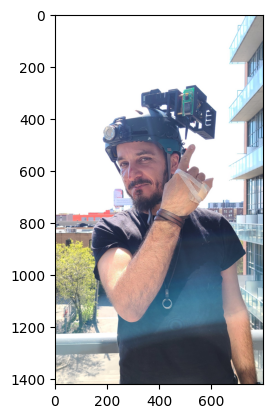

In [9]:
from matplotlib import pyplot as plt
import PIL

%matplotlib inline

filename = objects.path_of(object_name = model_object_name, filename = "validation/test_resized.jpg")
width = 800

im = PIL.Image.open(filename_raw)

aspect = im.size[0] / im.size[1]

# https://stackoverflow.com/a/14351890/17619982
im.thumbnail([width, int(width / aspect)], PIL.Image.LANCZOS)
im.save(filename, "JPEG")

plt.imshow(im)
plt.show()

In [10]:
from PIL import Image
import numpy as np


class ImageDeserializer(sagemaker.deserializers.BaseDeserializer):
    """Deserialize a PIL-compatible stream of Image bytes into a numpy pixel array"""

    def __init__(self, accept="image/png"):
        self.accept = accept

    @property
    def ACCEPT(self):
        return (self.accept,)

    def deserialize(self, stream, content_type):
        """Read a stream of bytes returned from an inference endpoint.
        Args:
            stream (botocore.response.StreamingBody): A stream of bytes.
            content_type (str): The MIME type of the data.
        Returns:
            mask: The numpy array of class labels per pixel
        """
        try:
            return np.array(Image.open(stream))
        finally:
            stream.close()


ss_predictor.deserializer = ImageDeserializer(accept="image/png")

In [11]:
ss_predictor.serializer = sagemaker.serializers.IdentitySerializer("image/jpeg")

with open(filename, "rb") as imfile:
    imbytes = imfile.read()

# Extension exercise: Could you write a custom serializer which takes a filename as input instead?

23 second(s) -> 1422x800:uint8: [ 0  1  3  5  6  7  8 13 14 15 17 18 19 20]


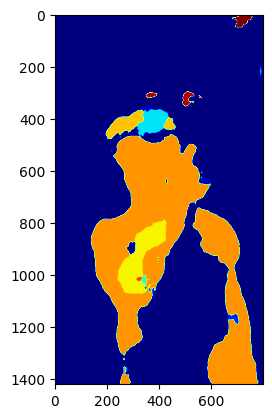

In [12]:
start_time = time.time()
cls_mask = ss_predictor.predict(imbytes)
elapsed_time = time.time() - start_time

logger.info("{} -> {}: {}".format(
    string.pretty_duration(elapsed_time),
    string.pretty_shape_of_matrix(cls_mask),
    np.unique(cls_mask),
))

plt.imshow(cls_mask, cmap="jet")
plt.savefig(objects.path_of(object_name = model_object_name, filename = "validation/output.jpg"))
plt.show()

In [13]:
# assert False
ss_predictor.delete_endpoint()

Deleting endpoint configuration with name: sagesemseg-model-2024-02-05-20-08-53-02-2024-02-06-04-26-59-009
Deleting endpoint with name: sagesemseg-model-2024-02-05-20-08-53-02-2024-02-06-04-26-59-009


In [14]:
%%bash -s $model_object_name
source ~/git/awesome-bash-cli/abcli/.abcli/abcli.sh in_notebook

model_object_name=$1

abcli_upload - $model_object_name

🔋 gpu: not found.
🚀 abcli-7.2675.1.2023-06-aws-batch-a
confirmed: sagesemseg-model-2024-02-05-20-08-53-02274 does not exist.
sagesemseg-model-2024-02-05-20-08-53-02274 open upload started.
upload: ../../../../../storage/abcli/sagesemseg-model-2024-02-05-20-08-53-02274/validation/output.jpg to s3://kamangir/bolt/sagesemseg-model-2024-02-05-20-08-53-02274/validation/output.jpg
upload: ../../../../../storage/abcli/sagesemseg-model-2024-02-05-20-08-53-02274/validation/test_resized.jpg to s3://kamangir/bolt/sagesemseg-model-2024-02-05-20-08-53-02274/validation/test_resized.jpg
upload: ../../../../../storage/abcli/sagesemseg-model-2024-02-05-20-08-53-02274/validation/test.jpg to s3://kamangir/bolt/sagesemseg-model-2024-02-05-20-08-53-02274/validation/test.jpg


sagesemseg-model-2024-02-05-20-08-53-02274 += #open.


In [15]:
# END